# **서론**


In [62]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Q. 이번 2020년, 여러분은 집콕 하셨나요?**

<br>

코로나 바이러스(COVID-19)의 대유행으로 집콕도 함께 유행하는 동안, 전 세계 많은 젊은층들이 주식 시장에 뛰어들기 시작했습니다. 자가 격리로 인해 많은 이들이 집에 있는 시간이 늘어나면서, 온라인으로 주식 계좌를 개설하고 자신만의 투자를 시작했습니다.
<br>

한국에서도 많은 소규모 투자자들이 코로나로 인한 주식 폭락 사태를 주식 시장에 진출 할 수 있는 ‘천재일우’로 보고 있는데요, 이 기간에 유입된 젊은층또한 코로라라는 악재를 소규모라도 조금이나마 돌리려는 노력을 하고 있습니다. 

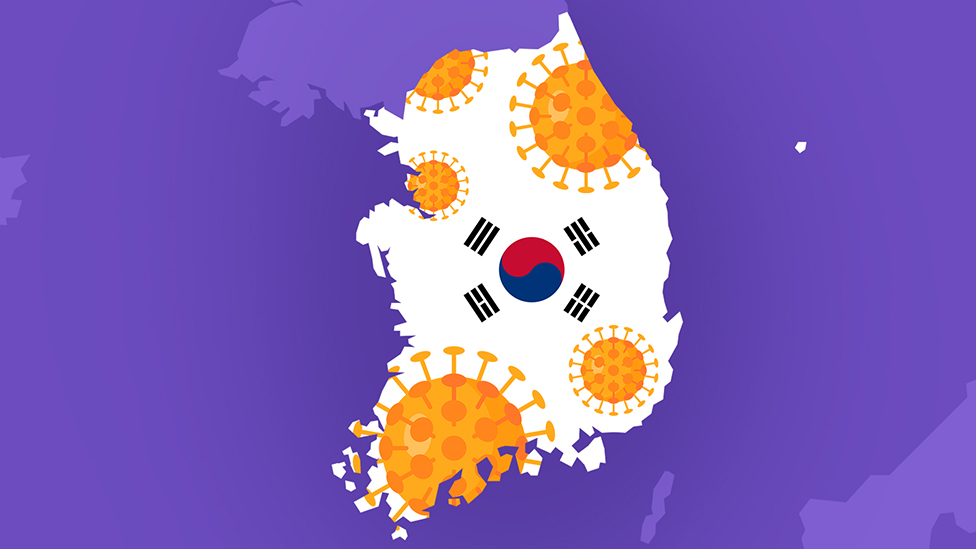

In [63]:
from IPython.display import Image
Image('/content/drive/Shareddrives/dacom_yz/한국코로나.jpg', width = 600, height = 300)

이렇게 전례없는 Y(30-40세) & Z(20-30세)세대의 주식계 유입은 외면할 수 없는 사실입니다. 이러한 트렌드에 발맞춰 NH증권사에서도 Y&Z세대에 대한 폭넓은 이해를 바탕으로 서비스 개선을 위해 이번 프로파일링 대회를 개최하지 않았나 싶어요. 훌륭합니다! NH :)
<br><br>

손자병법에서 '知彼知己, 百戰白勝', '지피지기면 백전백승'이라고 하지 않았나요? 비록 Y&Z세대가 우리의 적은 아니지만, 그들의 마음을 얼마나 사로잡을 수 있는지는 <u>그들을 얼마나 잘 이해하느냐에 달려있을 것 같습니다. </u>

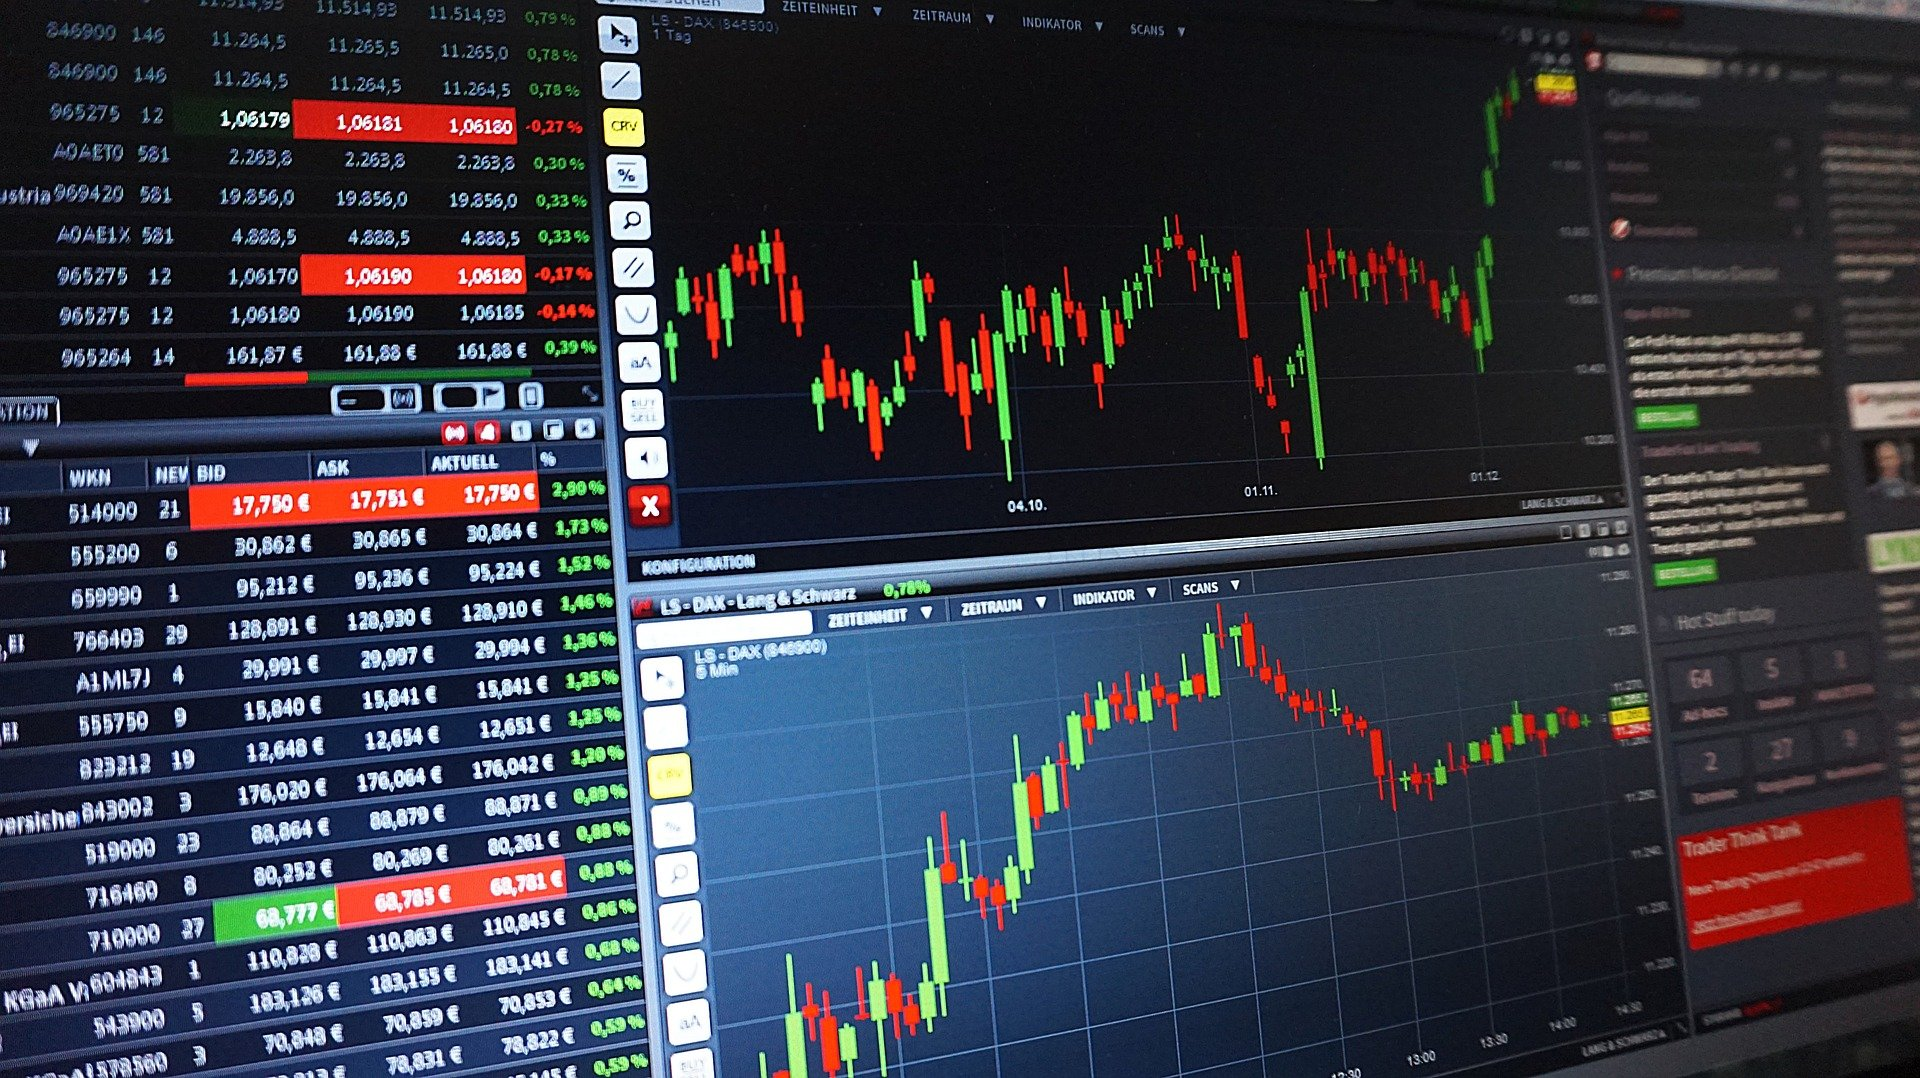

In [64]:
Image('/content/drive/Shareddrives/dacom_yz/주식사진.jpg', width = 600, height = 300)

# **0. 라이브러리 및 데이터 불러오기**


---


In [65]:
pip install plotly==4.11.0

In [66]:
import pandas as pd
import numpy as np

#데이터 시각화 라이브러리 불러오기
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

#시계열 데이터 라이브러리 불러오기
from datetime import date, timedelta

#경고문 제거
import warnings
warnings.filterwarnings("ignore")

#데이터 불러오기
act_info = pd.read_csv('/content/drive/Shareddrives/dacom_yz/2_act_info.csv')
cus_info = pd.read_csv('/content/drive/Shareddrives/dacom_yz/2_cus_info.csv')
iem_info = pd.read_csv('/content/drive/Shareddrives/dacom_yz/2_iem_info.csv')
trd_kr = pd.read_csv('/content/drive/Shareddrives/dacom_yz/2_trd_kr.csv')

#datetime이 0인 행 제거
act_info = act_info.drop([513,14431],axis = 0)

#시계열 데이터 처리
act_info['act_opn_ym'] = pd.to_datetime(act_info['act_opn_ym'], format = '%Y%m')
trd_kr['orr_dt'] = pd.to_datetime(trd_kr['orr_dt'], format = '%Y%m%d')
trd_kr = trd_kr.sort_values(by = 'orr_dt', axis = 0).reset_index(drop = True)

#거래금액 계산
trd_kr['orr_pr_tot'] = trd_kr['cns_qty'] * trd_kr['orr_pr']



# **1. EDA(탐색적 데이터 분석)**

---

---






## **1.1. 코로나로 인한 주식 시장의 변화**

---



코로나라는 상황과 맞물려 실제로도 Y&Z세대의 투자 참여가 급증했는지 확인하기  위한 척도로 1) 주식 거래량 추세 2) 계좌 개설의 추세를 확인했습니다. 데이터는 2019년 1월부터 2020년 6월까지 조사되었습니다.

In [67]:
#주식 거래가 이루어진 날
act_dat = {i.strftime('%Y-%m-%d') for i in {*trd_kr['orr_dt']}}

#쉬는 날
hol_dat = {i.strftime('%Y-%m-%d') for i in {*pd.date_range('2019-01-01','2020-06-30')}} - act_dat

#주식 거래량, 2019-01-01 ~ 2020-06-20, 단위: 1억원
data = trd_kr.groupby('orr_dt')['orr_pr_tot'].sum().reset_index()

X = [*data['orr_dt']]
Y = [*data['orr_pr_tot'] / 1e+8]

linedate = '2020-01-02'
fig = make_subplots(1, 1)
fig.append_trace(go.Scatter(x = X, y = Y, fill = 'tozeroy', line_width = 1,line_color = 'rgb(0, 0, 0)'), 1, 1)
fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)' ,shapes = [dict(x0=linedate, x1=linedate, y0=0, y1=1, xref='x', yref='paper',line_width=1)],
                  annotations=[dict(x=linedate, y=1.07, xref='x', yref='paper',showarrow=False, xanchor='center', text='코로나로 인한 주식 거래량 증가')])
fig.update_xaxes(range=['2019-01-01', '2020-07-01'])

fig.update_layout(title="시간에 따른 주식 거래량 (단위: 1억원)", xaxis_title="날짜", yaxis_title="주식 거래량")
pyo.iplot(fig)

In [68]:
#계좌 개설수, 1976-03-01 ~ 2020-10-01, 단위: 1명
data = act_info.groupby('act_opn_ym')['act_id'].count().reset_index(name = 'act_num')

X = [*data['act_opn_ym']]
Y = [*data['act_num']]

linedate = '2020-01-02'
fig = make_subplots(1, 1)
fig.append_trace(go.Scatter(x = X, y = Y, fill = 'tozeroy', line_width = 1,line_color = 'rgb(0, 0, 0)'), 1, 1)
fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)' ,shapes = [dict(x0=linedate, x1=linedate, y0=0, y1=1, xref='x', yref='paper',line_width=1)],
                  annotations=[dict(x=linedate, y=1.07, xref='x', yref='paper',showarrow=False, xanchor='center', text='코로나로 인한 계좌 개설수 증가')])

fig.update_layout(title="날짜별 계좌 개설 수 (단위: 개)", xaxis_title="날짜", yaxis_title="계좌 개설수")
pyo.iplot(fig)

분석 결과, 주식 거래량과 계좌 개설 수가 2020년 2월 1일 기준 모두 급등하였음을 쉽게 알 수 있었습니다. 특히 계좌 개설 수는 코로나 발생(2020.02.01)을 기점으로 이전의 두 배 가량 상승하였고, 3월경 1608개로 최고점을 찍었습니다.

이러한 결과를 바탕으로 저희는 2020년 2월 이후 개설된 계좌와 이전에 개설된 계좌에 차이가 있을 것이다라는 가정 하에 분석을 진행하게 되었습니다. 이때 추가로 고려해야 할 점은 다음과 같습니다.
1. 2020년 2월 이전에도 코로나 영향에 의해 개설된 계좌가 충분히 있을 수 있다.
2. 2020년 2월 이후에도 기본 유입 투자자의 비율이 포함되어 있다.

이에 대한 자세한 분석은 <u>Chapter 3</u>에서 진행합니다.

## **1.2. 고객 수**

---



In [69]:
#2_act_info 데이터에 있는 고객 수
len({*act_info['cus_id']})

10000

In [70]:
#2_trd_kr 데이터에 있는 고객 수
len({*pd.merge(trd_kr, act_info, how = 'left', on = 'act_id')['cus_id']})

9909

In [71]:
#2_act_info와 2_trd_kr 데이터에 있는 고객 수
len({*[*pd.merge(trd_kr, act_info, how = 'left', on = 'act_id')['cus_id']] + [*act_info['cus_id']]})

10000

2_act_info 데이터 (고객별 계좌번호 정보)에 있는 고객 수와 2_trd_kr (국내 주식 매매 상세정보)에 있는 고객의 수가 91명 차이가 납니다.

이는 2_act_info 데이터에 있는 모든 고객들이 2019.01.01~2020.06.20 기간의 거래에 참여한 것은 아님을 의미합니다.


따라서 저희는 act_info의 고객들 중 일부(91명)은 분석에서 제외했습니다.

## **1.3. 지역에 따른 고객 수**

---



[링크 텍스트](https://)지역별로 Y & Z세대 고객이 어떻게 분포해있는지 쉽게 파악하기 위해 대한민국 지도 heatmap을 그렸습니다.

In [72]:
import json
import folium
import urllib.request

state_geo = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"

cus_eng = cus_info
yz_eng_20 = cus_eng['cus_age'] == 20
yz_eng_25 = cus_eng['cus_age'] == 25
yz_eng_30 = cus_eng['cus_age'] == 30
yz_eng_35 = cus_eng['cus_age'] == 35

cus_yz_eng = cus_eng.loc[cus_eng['cus_age'].index[yz_eng_20 | yz_eng_25 | yz_eng_30 | yz_eng_35]]
names = ['서울특별시', '경기도', '경상남도', '부산광역시','인천광역시','대구광역시', '경상북도', '충청남도', '대전광역시', '충청북도', '광주광역시', '전라북도', '전라남도', '강원도', '울산광역시', '세종특별자치시', '제주특별자치도', '?']
customers = cus_yz_eng['zip_ctp_cd'].value_counts()
tmp = pd.DataFrame({"name" : names, "customers" : customers})
tmp1 = tmp.reset_index(drop=True)
state_data = tmp1 

m = folium.Map(location=[36.5, 128], zoom_start=7)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=('name', 'customers'),
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='The Number of Customers'
).add_to(m)

folium.LayerControl().add_to(m)

m

주로 서울과 경기도에 매우 집중적으로 분포해있고 (각각 700-800명), 경남 및 부산 지역에 꽤 거주하고 있습니다 (각각 200-300명).

 이외의 지역은 100명대 혹은 그 밑으로 비슷합니다.

# **2. 데이터 전처리**

---

---





## **2.1. 계좌 개설 시기에 따른 고객 구분**

---




In [73]:
#2020-02 이전(<) 개설 된 통장을 가지고 있는 고객들
old_cus = pd.DataFrame()
old_cus['cus_id'] = [*{*(act_info[act_info['act_opn_ym'] < '2020-02'])['cus_id']}]
old_cus['old'] = 1

#2020-02 이후(>=) 개설 된 통장을 가지고 있는 고객들
new_cus = pd.DataFrame()
new_cus['cus_id'] = [*{*(act_info[act_info['act_opn_ym'] >= '2020-02'])['cus_id']}]
new_cus['new'] = 1

#2019-01-01 ~ 2020-06-20 거래 내역이 있는 고객들
trd_cus = pd.DataFrame()
trd_cus['cus_id'] = [*{*pd.merge(trd_kr, act_info, how = 'left', on = 'act_id')['cus_id']}]
trd_cus['trd'] = 1

## **2.2. 추가된 태그 업데이트**

---




In [74]:
#특정 조건을 만족하는 데이터를 추출할 때 사용할 클래스 정의
class Con:
  def __init__(self, df, **params):
    _df = df
    for key, value in params.items():
      _df = _df[_df[key] == value]
    self._df = _df

#act_info 데이터 업데이트
act_info = pd.merge(act_info, old_cus, how = 'left', on = 'cus_id')
act_info = pd.merge(act_info, new_cus, how = 'left', on = 'cus_id')
act_info = pd.merge(act_info, trd_cus, how = 'left', on = 'cus_id')
act_info = act_info[act_info['trd'] == 1].drop(['trd'], axis = 1)
act_info = act_info.fillna(0)

#trd_kr 거래자에 대한 개인정보 업데이트
trd_kr = pd.merge(trd_kr, act_info, how = 'left', on = 'act_id')
trd_kr = pd.merge(trd_kr, cus_info, how = 'left', on = 'cus_id')
trd_kr = trd_kr.drop(['act_id', 'act_opn_ym', 'zip_ctp_cd', 'orr_rtn_hur', 'lst_cns_hur'], axis = 1)

#고객의 주식 수 누적 합계
df_ = Con(trd_kr, old = 0, new = 1)._df
df_['orr_dt'] = [i.strftime('%Y%m%d') for i in df_['orr_dt']]
df_['orr_ord'] = [str(i).zfill(4) for i in df_['orr_ord']]
df_['tim'] = df_['orr_dt'] + df_['orr_ord']
df_['cns_qty'] = (df_['sby_dit_cd'] * 2 - 3) * df_['cns_qty']
df_ = df_.groupby(['cus_id', 'iem_cd', 'tim']).sum().groupby(level = [0, 1]).cumsum()

#해당 투자 증권에 2020-02 이후 처음으로 계좌를 개설한 고객의 주식 타사대체입고 여부
fak_new_cus = pd.DataFrame()
fak_new_cus['cus_id'] = [*{*(df_[df_['cns_qty'] < 0].reset_index()['cus_id'])}]
fak_new_cus['fak_new'] = 1

#데이터 업데이트
act_info = pd.merge(act_info, fak_new_cus, how = 'left',on = 'cus_id').fillna(0)
trd_kr = pd.merge(trd_kr, fak_new_cus, how = 'left',on = 'cus_id').fillna(0)

#주식 정보
trd_kr['iem_cd']  = [i.replace(' ','') for i in trd_kr['iem_cd']]
iem_info['iem_cd']  = [i.replace(' ','') for i in iem_info['iem_cd']]
iem_info['iem_krl_nm']  = [i.replace(' ','') for i in iem_info['iem_krl_nm']]

#시기에 따른 데이터 분류
trd_kr_af = trd_kr[trd_kr['orr_dt'] >= '2020-02']
trd_kr_bf = trd_kr[trd_kr['orr_dt'] < '2020-02']

#편의성을 위한 태그 추가
##group: 고객 주식 시작 여부(0: 원래 투자자이나 코로나 기간에 추가 계정을 만들지는 않음, 1: 원래 투자자이며 코로나 기간에 추가 계정을 만듦, 
##                           3: 원래 투자자이나 코로나 기간에 타사대체입고로 해당 증권에 처음 계정을 만듦, 4:코로나 기간에 주식을 시작함)
trd_kr['group'] = trd_kr['old'] * (-2) + trd_kr['new'] + trd_kr['fak_new'] * (-1) + 2
act_info['group'] = act_info['old'] * (-2) + act_info['new'] + act_info['fak_new'] * (-1) + 2

##orr_pr_tot_dit, cns_qty_dit: 매도, 매수에 의한 양적 변화
trd_kr['orr_pr_tot_dit'] = trd_kr['orr_pr_tot'] * (-1) * (trd_kr['sby_dit_cd'] - 1.5) * 2
trd_kr['cns_qty_dit'] = trd_kr['cns_qty'] * (trd_kr['sby_dit_cd'] - 1.5) * 2

##is_yz: Y&Z세대인가 아닌가
trd_kr['is_yz'] = ((trd_kr['cus_age'] >= 20) & (trd_kr['cus_age'] <= 35)) *1
trd_kr = trd_kr.fillna(0)

코로나 발생(2020.02.01) 기점으로 이전에 개설된 계좌가 있는 고객에 'old' 태그를, 이후에 개설된 계좌는 'new' 태그를 부여하였습니다. 즉, old 태그가 1이라면 기존부터 주식을 하던 사람이라는 것을 알 수 있습니다.
<br><br>

그러나 new 태그가 1이고 old 태그가 0이라고 해서 단순히 코로나로 인해 주식을 처음 시작하는 사람이라고 보기에는 무리가 있었습니다. 원래 주식을 하던 사람이지만 타사에 새로운 계좌를 만들었거나, 타사 대체입고로 유입되었을 가능성 또한 있기 때문입니다.

따라서 저희는 고객, 주식별 주식 수 누적 합계를 이용하여 타사 대체입고로 추가된 고객을 일부 선별해내어 'fake_new' 태그를 부여했습니다.

<br>
이후 간단하게

1) 원래 투자자이나 코로나 기간에 추가 계정을 만들지는 않은 투자자를 **old 투자자**, 

2) 원래 투자자이며 코로나 기간에 추가 계정을 만든 투자자를 **old-new 투자자**,

3) 원래 투자자이나 코로나 기간에 타사대체입고로 해당 증권에 처음 계정을 만든 투자자를 **fake-new 투자자**,

4) 코로나 기간에 주식을 처음 시작한 것으로 추측되는 투자자를 **new 투자자**라고 하겠습니다.

# **3. 데이터 분석**
 처음 주식을 시작하는 Y&Z 세대에 대하여

---

---



## **3.1. 고객 분포**

---




In [75]:
#주식 시작 여부에 따른 고객 수 분포
data = act_info.drop_duplicates(['cus_id']).groupby(['group'])['cus_id'].count().reset_index(name = 'cus_num')

name = ['old 투자자', 'old-new 투자자', 'fake-new 투자자', 'new 투자자']
value = data['cus_num']

fig = make_subplots(1, 1, specs=[[{"type": "domain"}]])
fig.append_trace(go.Pie(labels = name, values = value,textinfo='label+percent',insidetextorientation='radial'), 1, 1)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_layout(title='투자자 종류에 따른 투자자 분포', legend_title="투자자 종류")
pyo.iplot(fig)

In [76]:
fig = make_subplots(1, 3)

database = act_info[act_info['act_opn_ym'] >= '2020-02']

class ConActNum(Con):
  def __init__(self, df = database, **params):
    super().__init__(df, **params)
    _df = self._df.groupby('act_opn_ym')['act_id'].count().reset_index(name = 'act_num')
    self.X = _df['act_opn_ym']
    self.Y = _df['act_num']

for i in range(1, 4):
  data = ConActNum(group = i)
  fig.append_trace(go.Bar(x = data.X, y = data.Y, name = name[i]), 1, 2)

fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)', barmode = "stack")
fig.update_layout(title="날짜별 계좌 개설 수 (단위: 개)", xaxis_title="날짜", yaxis_title="계좌 개설수", legend_title="주식 시작 시기")
pyo.iplot(fig)

코로나로 인해 주식에 새로 유입된 것으로 추정되는 고객은 1936명으로 전체의 20%에 해당됩니다. 즉 코로나 이후에 신규 투자자가 25% 정도가 증가하였음을 알 수 있습니다.

또한, 새로 개설된 계좌의 절반 이상이 'new 투자자'의 소유임을 알 수 있습니다.

## **3.2. 고객 연령대 분포**

---





In [77]:
class ConAgeGrp(Con):
  def __init__(self, df = trd_kr, **params):
    super().__init__(df, **params)
    _df = self._df.drop_duplicates('cus_id').groupby('cus_age')['cus_id'].count().reset_index(name = 'cus_num')
    self.key = _df['cus_age']
    self.value = _df['cus_num']

name = ['19세 이하']
for i in ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70']:
  name.append(i+' ~ '+str(int(i)+5)+'세')
name = {value: name[i] for i, value in enumerate(sorted({*trd_kr['cus_age']}))}
ranks = ['기존 투자자','신규 통장 개설 기존 투자자','신규 투자자']
fig = make_subplots(1, 3, specs = [[{"type": "pie"}] * 3] * 1, subplot_titles=([f'<{rank}>' for rank in ranks]))

data = ConAgeGrp(old = 1, new = 0)
name_ = [name[i] for i in data.key]
fig.append_trace(go.Pie(labels = name_, values = data.value,textinfo='label+percent',insidetextorientation='radial'), 1, 1)

data = ConAgeGrp(old = 1, new = 1)
name_ = [name[i] for i in data.key]
fig.append_trace(go.Pie(labels = name_, values = data.value,textinfo='label+percent',insidetextorientation='radial'), 1, 2)

data = ConAgeGrp(old = 0, new = 1)
name_ = [name[i] for i in data.key]
fig.append_trace(go.Pie(labels = name_, values = data.value,textinfo='label+percent',insidetextorientation='radial'), 1, 3)

fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_layout(title="투자자 그룹에 따른 나이 분포", legend_title="투자자 나이")

pyo.iplot(fig)

In [78]:
ranks = ['순수 신규 투자자', '타사대체입고자']
fig = make_subplots(1,2, specs = [[{"type": "pie"}] * 2] * 1, subplot_titles=([f'<{rank}>' for rank in ranks]))

for i in range(2, 4):
  data = ConAgeGrp(group = i)
  name_ = [name[i] for i in data.key]
  fig.append_trace(go.Pie(labels = name_, values = data.value,textinfo='label+percent',insidetextorientation='radial'),  1,i-1)

fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_layout(title="투자자 그룹에 따른 나이 분포", legend_title="투자자 나이")

pyo.iplot(fig)

원래 주식은 40 ~ 54 나이대의 고객이 주류를 차지 하고 있었습니다. 또한, 코로나 기간 동안 주로 25 ~ 35 나이대의 고객이 추가 유입되었습니다. 따라서 "해당 연령층이 많이들 새로 주식을 시작하는구나"라고 생각하실 수도 있습니다. 하지만 이 유입 인구를 타사 대체입고 여부를 통해 분리하여 보면, 25 ~ 35 나이대의 고객들은 타사 대체입고로 들어 오는 경우가 더 많다는 것을 확인할 수 있습니다.
<br><br>
뿐만 아니라, 25 ~ 30 나이대의 고객을 제외하면 주식을 처음 시작하는 Y & Z 세대의 비율은 다른 나이대와 비교하여 크지 않습니다. 이는 Y & Z 세대 고객 증가 예측에 의해 증권의 해당 연령대 서비스가 많이 추가되었고 이에 따라 증권간 고객 이동이 잦아지며 Y & Z 세대 고객 증가가 더 크게 보여주게 만드는 효과가 있었을 수도 있다고 추측해 볼 수 있습니다.

## **3.3. 투자자 그룹별 거래분석**

---




In [79]:
class ConTimAmt(Con):
  def __init__(self, df = trd_kr, **params):
    super().__init__(df, **params)
    _df = self._df
    date = sorted({*_df.orr_dt})
    pri = _df.groupby('orr_dt')['orr_pr_tot'].sum()
    num = _df.drop_duplicates(['orr_dt', 'cus_id']).groupby('orr_dt')['cus_id'].count()
    _df = pd.DataFrame()
    _df['date'] = date
    _df['pri'] = [*pri]
    _df['num'] = [*num]
    _df['pri_per'] = [*np.around(pri / num)]
    _df = _df.set_index('date').resample('D').asfreq().fillna(0).reset_index().sort_values(by = 'date', axis = 0).reset_index(drop = True)
    self.date = _df['date']
    self.pri = _df['pri']
    self.num = _df['num']
    self.pri_per = _df['pri_per']

In [80]:
fig = make_subplots(4, 1, shared_xaxes = True, shared_yaxes=True)
name_ = ['old 투자자', 'old-new 투자자', 'fake-new 투자자', 'new 투자자']

for i in range(4):
  data = ConTimAmt(group = i)
  fig.append_trace(go.Bar(x = data.date, y = data.pri / 100_000_000,name = name_[i]), i+1, 1)

fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_xaxes(rangebreaks = [dict(values = [*hol_dat])], linecolor = 'rgb(0, 0, 0)')
fig.update_yaxes(range=[0, 800])
fig.update_layout(title="날짜별 주식 총 거래량 (단위: 천만 개)")
pyo.iplot(fig)

In [81]:
fig = make_subplots(4, 1, shared_xaxes = True, shared_yaxes=True)

for i in range(4):
  data = ConTimAmt(group = i)
  fig.append_trace(go.Bar(x = data.date, y = data.pri_per / 10_000,name = name_[i]), i+1, 1)
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)', barmode="stack")
fig.update_yaxes(range=[0, 8_000])
fig.update_xaxes(rangebreaks = [dict(values = [*hol_dat])], linecolor = 'rgb(0, 0, 0)')
fig.update_layout(title="날짜별 1인당 주식 거래량 (단위: 만 개)", xaxis_title="날짜", yaxis_title="1인당 주식 거래량")
pyo.iplot(fig)

In [82]:
fig = make_subplots(1 ,5)

data = trd_kr[trd_kr['orr_dt'] >= '2020-02']

name = ['old 투자자', 'old-new 투자자', 'fake-new 투자자', 'new 투자자']
value_per = [*data.groupby('group')['orr_pr_tot'].sum() / data.drop_duplicates('cus_id').groupby('group')['cus_id'].count()/10_000_000]

fig.append_trace(go.Bar(x = name, y = value_per), 1,1)
fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_layout(title="1인당 주식 거래량 (단위: 천만 원)", xaxis_title="투자자 종류", yaxis_title="1인당 주식 거래량")

pyo.iplot(fig)

고객 유입 특징별로 총 거래량과 1인당 거래량을 비교하였을 때, 원래 주식을 하던 'old'와 'old-new' 투자자들이 높은 총 거래량과 1인당 거래량을 보였습니다. 당연하게도 new 투자자들은 낮은 1인당 거래량을 보였습니다. 또, fake-new 투자자는 유입 후 정체 시기를 고려했을 때 old-new 투자자와 비슷한 양상을 보였습니다. 

다소 신기한 사실은, 'old-new' 투자자와 'old' 투자자의 1인당 거래량 사이에 유의미한 차이가 존재한다는 점입니다. 이는 이 투자자 집단 간의 나이 차에서 기인한 것으로 보입니다. old 투자자의 주류 나이대가 old-new보다 보통 5 정도 크기 때문에 이에 따라 전체적인 재력 차이가 발생한 것 같습니다.

## **3.4. 신규 Y&Z 세대 투자자**

---



In [83]:
fig = make_subplots(1, 1, specs=[[{"type": "domain"}]])

data = trd_kr[trd_kr['orr_dt'] >= '2020-02']
data = data.drop_duplicates('cus_id').groupby(['group', 'is_yz'])['cus_id'].count().reset_index(name = 'cus_num')

name = ['기존 x세대 투자자', '기존 yz세대 투자자', '신규 x세대 투자자', '신규 yz세대 투자자']
value = []

value.append(data[(data['group'] != 3) & (data['is_yz'] != 1)]['cus_num'].sum())
value.append(data[(data['group'] != 3) & (data['is_yz'] == 1)]['cus_num'].sum())
value.append(data[(data['group'] == 3) & (data['is_yz'] != 1)]['cus_num'].sum())
value.append(data[(data['group'] == 3) & (data['is_yz'] == 1)]['cus_num'].sum())

fig.append_trace(go.Pie(labels = name, values = value,textinfo='label+percent',insidetextorientation='radial'), 1, 1)
fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(title="투자자 종류에 따른 투자자 분포", legend_title="투자자 종류")
pyo.iplot(fig)

In [84]:
fig = make_subplots(1, 1, specs = [[{"type": "pie"}] * 1] * 1)

data = trd_kr[trd_kr['orr_dt'] >= '2020-02']
data = data.groupby(['group', 'is_yz'])['orr_pr_tot'].sum().reset_index()

name = ['기존 x세대 투자자', '기존 yz세대 투자자', '신규 x세대 투자자', '신규 yz세대 투자자']

value = []

value.append(data[(data['group'] != 3) & (data['is_yz'] != 1)]['orr_pr_tot'].sum())
value.append(data[(data['group'] != 3) & (data['is_yz'] == 1)]['orr_pr_tot'].sum())
value.append(data[(data['group'] == 3) & (data['is_yz'] != 1)]['orr_pr_tot'].sum())
value.append(data[(data['group'] == 3) & (data['is_yz'] == 1)]['orr_pr_tot'].sum())

fig.append_trace(go.Pie(labels = name, values = value,textinfo='label+percent',insidetextorientation='radial'), 1, 1)
fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(title="투자자 종류에 따른 총거래량", legend_title="투자자 종류")
pyo.iplot(fig)

2020년 2월 이후의 투자자를 대상으로 분석해보면, 투자자 인구의 35% 정도가 Y & Z세대로 좁은 연령폭(20~40)에 비해 큰 비중을 차지하고 있음을 확인할 수 있습니다. 또한, 코로나로 인해 새로 주식을 시작한 Y & Z세대는 전체 투자자의 11% 정도를 차지하며 성장 가능성을 고려하면 무시할 수 없음은 당연합니다. 

그렇지만 새로 유입된 이들('new')이 끼치는 영향력은 전채 거래량의 3% 이하 정도로 그 수에 비해 큰 비중을 차지하고 있지는 않습니다. 더군다나 코로나로 인해 시작된 유행에 따라 주식을 시작하였을 경우, 반복되는 실패나 관심 부족으로 기존 유입자들보다 쉽게 흥미를 잃음으로써 그 영향력은 충분히 지속적이지 못할 가능성이 높습니다.

## **3.5 결과**

---



<u>따라서 단순히 당장의 Y & Z세대를 사로잡기 위해 노력하기보다는, 이들이 미치는 영향을 보다 자세히 이해하고 급등/락과 같은 추세에 현혹되지 않을 필요가 있습니다.</u> 또한, 젊은 유입 세대의 지속적 거래를 돕는 다양한 설비나 도움을 통해 당장의 적은 이득보다는 장기적인 고객 수 증가에 힘썼을 때 NH 증권의 성장이 이뤄질 수 있을 것으로 보입니다.

# **4. 거래 횟수에 따른 주식 종목과 투자자 분석**

---
---

## **4.1 주식 및 투자자 분석**

---





수익이나 등급, 계좌 개설일같은 것들과 별개로, 거래 횟수가 곧 주식 자체에 대한 관심도로 이어질 수 있다고 생각했습니다. 따라서 거래 횟수를 기준으로 사용자 그룹을 나누어 분석해봤습니다. 

거래 횟수가 10회 이하, 즉 크게 인기가 있지 않은 종목들, 거래 횟수가 높은 상위 100개의 종목들, 그리고 나머지 종목들 총 4개의 그룹으로 나누어 각 그룹에 속한 종목들의 특징을 살펴봤습니다. 

In [85]:
iem_data = pd.DataFrame()
iem_data['iem_cd'] = sorted({*trd_kr['iem_cd']})
iem_data['orr_pr_tot'] = [*trd_kr.groupby('iem_cd')['orr_pr_tot'].sum()]
iem_data['trd_cnt'] = [*trd_kr.groupby('iem_cd')['orr_pr_tot'].count()]
iem_data['orr_pr'] = [*trd_kr.groupby('iem_cd')['orr_pr'].mean()]
iem_data['cns_qty'] = [*trd_kr.groupby('iem_cd')['cns_qty'].mean()]
iem_data['orr_pr_dif'] = [*np.around((1 - trd_kr.groupby('iem_cd')['orr_pr'].min() / trd_kr.groupby('iem_cd')['orr_pr'].mean()) * 100)]
iem_data = iem_data.sort_values('trd_cnt').reset_index()

iem_data0 = iem_data[iem_data.trd_cnt<34]
iem_data5 = iem_data[len(iem_data)-100:]
iem_data = iem_data[iem_data.trd_cnt>=34][:len(iem_data)-100]
n = len(iem_data)
iem_data1 = iem_data[0:int(n/4)]
iem_data2 = iem_data[int(n/4):int(n/2)]
iem_data3 = iem_data[int(n/2):int(3*n/4)]
iem_data4 = iem_data[int(3*n/4):n]

fig = make_subplots(1, 3, subplot_titles=("주식 매매 횟수", "주식 매매량",'종목 평균 주가'))
name = ['10<','group1','group2','group3','group4','top']
for i,key in enumerate(['trd_cnt','cns_qty','orr_pr']):
  data = []
  for j in [iem_data0,iem_data1,iem_data2,iem_data3,iem_data4,iem_data5]:
    data.append(np.mean([*j[key]]))
  fig.append_trace(go.Bar(x = name, y = data), 1, i+1)

fig.update_layout(title = '주식 종목별 매매 정보')
fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_layout(showlegend=False)

pyo.iplot(fig)

In [86]:
cus_data = pd.DataFrame()
cus_data['iem_cd'] = sorted({*trd_kr['cus_id']})
cus_data['orr_pr_tot'] = [*trd_kr.groupby('cus_id')['orr_pr_tot'].sum()]
cus_data['trd_cnt'] = [*trd_kr.groupby('cus_id')['orr_pr_tot'].count()]
cus_data['orr_pr'] = [*trd_kr.groupby('cus_id')['orr_pr'].mean()]
cus_data['cns_qty'] = [*trd_kr.groupby('cus_id')['cns_qty'].mean()]
cus_data['orr_pr_dif'] = [*np.around((1 - trd_kr.groupby('cus_id')['orr_pr'].min() / trd_kr.groupby('cus_id')['orr_pr'].max()) * 100)]
cus_data = cus_data.sort_values('trd_cnt').reset_index()

cus_data0 = cus_data[cus_data.trd_cnt < 10]
cus_data5 = cus_data[len(cus_data) - 100:]
cus_data = cus_data[cus_data.trd_cnt >= 34][:len(cus_data) - 100]
n = len(cus_data)
cus_data1 = cus_data[0:int(n / 4)]
cus_data2 = cus_data[int(n / 4):int(n / 2)]
cus_data3 = cus_data[int(n / 2):int(3 * n / 4)]
cus_data4 = cus_data[int(3 * n / 4):n]

fig = make_subplots(1, 3, subplot_titles=("주식 매매 횟수", "주식 매매량",'종목 평균 주가'))
name = ['10<','group1','group2','group3','group4','top']
for i,key in enumerate(['trd_cnt','cns_qty','orr_pr']):
  data = []
  for j in [cus_data0,cus_data1,cus_data2,cus_data3,cus_data4,cus_data5]:
    data.append(np.mean([*j[key]]))
  fig.append_trace(go.Bar(x = name, y = data), 1, i+1)

fig.update_layout(title = '개인별 매매 정보')

fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_layout(showlegend=False)

pyo.iplot(fig)

주식 매매 횟수가 많은 종목들은 주식 매매량도 많은 것을 확인할 수 있습니다.

인기있는 종목에 대하여 많은 사람들이 그 종목을 사고 판다는 것을 확인할 수 있는 지표라고 생각합니다.

또한 이렇게 매매량이 많은 종목들이 주가 역시 높은것은 인기 있는 종목의 대부분이 주가가 큰 종목임을 알 수 있습니다.

# **5. TOP 10 주식**

---
---

## **5.1 시기별 매수 체결량 TOP 10**
---



주식에 있어서, 인기 종목에 관한 용어로 특징주와 테마주가 있습니다.

 - **특징주**
> 코스피 & 코스닥 상한가, 검색상위, 거래량상위 종목 등 시장에 주목을 받았던 특징있는 주식

 - **테마주**
> 하나의 주제를 가진 사건에 의해 같은 방향으로 주가가 움직이는 종목군

(*이 두 용어는 완벽한 분리가 어렵기 때문에, <u>테마주</u>의 의미에 좀 더 초점을 두고 테마주로 통일하겠습니다)


<br><br>
또한, 이슈주를 다음과 같이 정립하겠습니다.

 - **이슈주**
> 속해있는 테마와는 별개로, 이슈성에 따라 급등/락을 판단할 수 있는 주


앞선 분석들에서 확인했던 바와 같이, YZ 세대에서 전문 투자자의 비율은 극히 낮습니다. 또한, 코로나 이후 신규 투자자 ('new')는 안전한 투자를 지향하는 것처럼 보였습니다. 따라서 YZ 세대의 투자 패턴은 파생상품이나 테마주, 이슈주 정도에 따라 단순한 양상을 보일 수 있을 것으로 예상됩니다.
<br><br>
YZ 세대가 데이터 속 기간 (2019년 1월 초 - 2020년 6월 중순) 동안 어떤 국내 주식종목에 관심이 있었는지를 확인해보기 위해서, 매수 체결량 합산을 기준으로 TOP 10 인기 종목을 Pie Chart로 확인했습니다.

비슷한 방식으로 이번에는 고객의 유형을 주식에 관심이 별로 없는 거래횟수 10회 이하, 거래 횟수 상위 100명, 그 외의 세 그룹으로 나누어 분석을 진행했습니다. 

주식 매매 횟수가 많은 그룹일수록 주식 매매량은 적어지는 것을 확인할 수 있습니다. 

이는 적은 양의 주식에 대한 매수와 매도를 반복하는 개미 투자자들이 많이 존재한다는 것을 보여줍니다. 

반면 종목 평균 주가는 올라가는데 이는 개미 투자자들이 위험을 감수하면서도 큰 이득을 원한다고 볼 수 있습니다.

In [87]:
data = trd_kr[trd_kr['sby_dit_cd'] == 2][trd_kr['is_yz'] == 1].groupby('iem_cd')['cns_qty'].sum().reset_index().sort_values('cns_qty')[-10:]
data = pd.merge(data, iem_info, how = 'left',on='iem_cd')

fig = make_subplots(1, 2, specs = [[{"type": "pie"}] * 2] * 1)

name_ = [*data['iem_krl_nm']]
value_ = [*data['cns_qty']]
fig.append_trace(go.Pie(labels = name_, values = value_,textinfo='label+percent',insidetextorientation='radial'), 1, 1)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_layout(title='거래 횟수 top 10 주식 분포', legend_title="주식 종목")
pyo.iplot(fig)

### **<종합>** 
1위는 에스맥 (17.8%)이고, 2, 3, 4위는 삼성 관련 파생주 (각각 17.2% / 16.1% / 9.37%) 가 차지하였습니다. 5위 신성통상보통주 (8.8%), 6위 케이엔엔 (7.66%), 7-10위는 5.5~6% 정도의 비율을 차지했습니다.

<br>

인기 종목은 시기별로 달라지기 마련이지만, 삼성 관련 주가 대중적으로 인기가 많은 것은 쉽게 알 수 있는 사실입니다. 이러한 일반 상식에 기반했을 때, <u> 에스맥이라는 낮선 종목이 매수 체결량 1위였다는 점 </u>에 주목할 필요성을 느꼈습니다. 또한, 신성통상보통주, 케이엔엔 등과 같은 상위권 종목에도 특별한 원인이 있는지 알아보기로 했습니다. <br><br>


우선, 코로나라는 빅이슈에 따른 이슈주 양상이 반영된 것인지 확인하기 위해서, 전염이 본격적으로 시작되었던 2020년 2월 1일을 기점으로 코로나 이전/이후를 나누었습니다.

In [88]:
data = trd_kr[trd_kr['orr_dt'] < '2020-02'][trd_kr['sby_dit_cd'] == 2][trd_kr['is_yz'] == 1].groupby('iem_cd')['cns_qty'].sum().reset_index().sort_values('cns_qty')[-10:]
data1 = trd_kr[trd_kr['orr_dt'] >= '2020-02'][trd_kr['sby_dit_cd'] == 2][trd_kr['is_yz'] == 1].groupby('iem_cd')['cns_qty'].sum().reset_index().sort_values('cns_qty')[-10:]
data = pd.merge(data, iem_info, how = 'left',on='iem_cd')
data1 = pd.merge(data1, iem_info, how = 'left',on='iem_cd')

fig = make_subplots(1, 2, specs = [[{"type": "pie"}] * 2] * 1,subplot_titles=('코로나 이전 TOP 10 매수인기 국내종목','코로나 이후 TOP 10 매수인기 국내종목'))

name_ = [*data['iem_krl_nm']]
value_ = [*data['cns_qty']]
fig.append_trace(go.Pie(labels = name_, values = value_,textinfo='percent',insidetextorientation='radial'), 1, 1)

name_ = [*data1['iem_krl_nm']]
value_ = [*data1['cns_qty']]
fig.append_trace(go.Pie(labels = name_, values = value_,textinfo='percent',insidetextorientation='radial'), 1, 2)

fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
fig.update_layout(title='거래 횟수 top 10 주식 분포', legend_title="주식 종목")
pyo.iplot(fig)

**<코로나 이전 이후>** <br>

###**<이전>**
1, 2위는 삼성 관련 파생주 (33.2% / 10.7%), 3위는 군수용품을 판매하는 경창산업 (8.99%), 4위 이아이디 (8.85%), (2차전지), 5위 바른테크놀로지(8.32%), 6위 에스모(7.31%), 그 외 7-10위 각각 약 5-6%의 비율로 순위가 형성되었습니다.
<br><br>

*   경창산업(3위) : 군수용품 판매
*   이아이디(4위) : 2차전지 연구/개발
*   바른테크놀로지(5위) : 네트워크 장비 임대 / 정보통신망 유지보수사업
*   에스모(6위) : 자율주행 기술 개발



<br>위와 같이 주로 ICT/반도체 등과 같은 4차산업 테마주가 상위등급에 랭크했음을 미루어보아 <u>코로나 사태 이전, YZ세대가 주로 4차산업 관련 투자에 관심이 있었음을 알 수 있습니다. </u><br><br>

###**<이후>**
이전에 순위권에 없던 에스맥이 1위 (21.8%)로 급부상했습니다. 삼성 관련 파생주가 꾸준한 인기를 보여주며 2위 (19.4%)에 안착했고, 3위 또한 이전에 순위권에 없던 케이엔엔 (9.81%)이 맡았습니다. 본래 대부분의 종목의 인기는 꽃처럼 폈다가 시들기를 반복하기 때문에 단순하게 유행 변화로 생각할 수 있지만, 조사한 결과는 다음과 같았습니다;
<br><br><br>


에스맥의 급부상은 에스맥이 자회사 다이노나를 통해 코로나19 치료제 개발 중에 있기 때문으로 해석할 수 있습니다. 이러한 이슈로 인해 에스맥이라는 이슈주의 인기가 YZ세대 사이에서 급등한 것으로 보입니다. <br>
[(에스맥 관련 기사)](https://m.stock.naver.com/item/main.nhn#/stocks/097780/news/0004456820/office/008)

<br>



KNN의 급부상 원인은, 5월 경 김종인 비대위원장의 당내 대선 주자 없다는 발언 속 홍정욱 전 의원 대권주자 부각됨에 따라 KNN, 고려산업, 한국프랜지, 디지틀조선 등 일부 정치/인맥(홍정욱) 테마가 상승세를 기록했다는 사실에서 찾을 수 있습니다. 이 또한 YZ세대가 시기별 이슈에 지속적인 관심을 두고 이슈주 매수를 시도한다는 것을 보여주는 분석입니다.<br>
[(케이엔엔 관련 분석)](https://whalesens.tistory.com/1735)

<br><br><br>
---
결론적으로, 크게는 코로나의 영향으로 에스맥이라는 이슈주가, 정치 문제 영향으로 케이엔엔이라는 이슈주가 급부상했으며, 코로나 이전-이후를 따지지 않았을 때는 4차산업 관련 테마주가 YZ세대에서 유행했음을 알 수 있습니다. 
<br> > 이러한 해석이 실제 데이터와 일치하는지 확인하기 위해서, 일별 매수 체결량 그래프를 통해 분석했습니다.






In [89]:
#fig.update_xaxes(range=['2019-01-01', '2020-07-01'])
fig = make_subplots(2, 1)
#linedate1 = '2020-02-01'
for i, value in enumerate(['A097780', 'A058400']):
  name = [*Con(iem_info, iem_cd = value)._df['iem_krl_nm']][0]
  data = Con(trd_kr, is_yz = 1, sby_dit_cd= 2, iem_cd = value)._df
  data = data.groupby('orr_dt')['cns_qty'].sum().reset_index()
  fig.append_trace(go.Scatter(x = data['orr_dt'], y = data['cns_qty'], name = name, mode = 'lines'), i + 1, 1)
fig.update_layout(title = '시간별 거래 정보  (개)', legend_title="주식 종목")
fig.update_xaxes(rangebreaks = [dict(values = [*hol_dat])], linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')
#fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)' ,shapes = [dict(x0=linedate1, x1=linedate1, y0=0.5, y1=1, xref='x', yref='paper',line_width=1)],
                  #annotations=[dict(x=linedate, y=1.07, xref='x', yref='paper',showarrow=False, xanchor='center', text='코로나로 인한 주식 거래량 증가')])

fig.update_yaxes(range=[0,100000])
pyo.iplot(fig)

위의 분석처럼, 에스맥과 케이엔엔은 각각과 관련된 이슈 발생에 따라 매수량이 급증하였고, 코로나의 경우 현재까지도 계속 지속되었기 때문에 2020년 6월까지도 매수 인기가 유지되었으며, 케이엔엔의 경우 순간적으로 폭등했다가 다시 급락했음을 알 수 있습니다.
<br>
<br>
더해서, 코로나 이전-이후를 따지지 않았을 때는 4차산업 관련 테마주가 YZ세대에서 실제로 꾸준히 유행했는가도 확인해보겠습니다.

In [90]:
fig = make_subplots(4, 1)

for i, value in enumerate(['A122630', 'A093230', 'A029480', 'A073070']):
  name = [*Con(iem_info, iem_cd = value)._df['iem_krl_nm']][0]
  data = Con(trd_kr, iem_cd = value)._df
  data = data.groupby('orr_dt')['cns_qty'].sum().reset_index()
  fig.append_trace(go.Scatter(x = data['orr_dt'], y = data['cns_qty'], name = name, mode = 'lines'), i + 1, 1)

fig.update_layout(title = '시간별 거래 정보  (개)', legend_title="주식 종목")
fig.update_xaxes(rangebreaks = [dict(values = [*hol_dat])], linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)', barmode = 'stack')
pyo.iplot(fig)

ICT/반도체와 같은 4차산업 관련주 대표로 1) 이아이디 2) 바른테크놀로지 3) 에스모 4) 삼성KODEX레버리지증권상장지수투자신탁(주식-파생형) 네 가지의 매수 체결량을 분석한 결과, 코로나 발생과 상관없이 YZ세대로부터 꾸준한 인기를 얻었음을 알 수 있습니다.<br><br> 다만 예외적으로 에스모가 2019년 9-10월경 비정상적인 상승세를 보였는데, 이는 당시 에스모가 중국의 중신그룹과 자율주행 협업 시스템을 체결하며 1억 달러를 투자받았기 때문으로 보입니다. 이는, 에스모가 테마주에 속하면서 동시에 이슈주로서도 YZ세대의 투자에 영향을 미쳤음을 시사합니다.

[(에스모 1억 달러 투자)](https://www.mk.co.kr/news/stock/view/2019/09/715610/)

## **5.2 고객 등급별 매수 체결량 TOP 10**


<hr>

YZ세대의 전반적인 투자가 에 의해 대체로 1) 4차산업 관련 테마주 2) 코로나 관련 특징주(*에스맥) - 에 의해 좌지우지 되었음을 알 수 있었습니다. 그렇다면, YZ세대 내에서도 고객등급 별로 주목할 만한 그룹별 특징 인사이트를 얻어낼 수 있는지 확인해보기 위해 <고객등급별 매수 인기 TOP10 국내종목>을  Pie Chart로 분석해보았습니다.

In [91]:
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}]*3]*2,subplot_titles=('<탑클라스>','<골드>','<로얄>','<그린>','<블루>','<헤당 없음>'))

data1 = trd_kr[trd_kr['sby_dit_cd'] == 2][trd_kr['is_yz'] == 1]


for i, value in enumerate(['01', '02', '03']):
  data = Con(data1,tco_cus_grd_cd = value)._df.groupby('iem_cd')['cns_qty'].sum().reset_index().sort_values('cns_qty')[-10:]
  data = pd.merge(data, iem_info, how = 'left',on='iem_cd')
  name_ = [*data['iem_krl_nm']]
  value_ = [*data['cns_qty']]
  fig.append_trace(go.Pie(labels = name_, values = value_), 1, i+1)

for i, value in enumerate(['04', '05']):
  data = Con(data1,tco_cus_grd_cd = value)._df.groupby('iem_cd')['cns_qty'].sum().reset_index().sort_values('cns_qty')[-10:]
  data = pd.merge(data, iem_info, how = 'left',on='iem_cd')
  name_ = [*data['iem_krl_nm']]
  value_ = [*data['cns_qty']]
  fig.append_trace(go.Pie(labels = name_, values = value_), 2, i+1)


data = data1[(data1['tco_cus_grd_cd'] == '09')|(data1['tco_cus_grd_cd'] == '-')].groupby('iem_cd')['cns_qty'].sum().reset_index().sort_values('cns_qty')[-10:]
data = pd.merge(data, iem_info, how = 'left',on='iem_cd')
name_ = [*data['iem_krl_nm']]
value_ = [*data['cns_qty']]
fig.append_trace(go.Pie(labels = name_, values = value_), 2, 3)


fig.update_xaxes(linecolor = 'rgb(0, 0, 0)')
fig.update_layout(plot_bgcolor = 'rgb(255, 255, 255)')

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="등급별 인기 국내종목 TOP 10")

pyo.iplot(fig)

In [92]:
act = pd.read_csv('/content/drive/Shareddrives/dacom_yz/2_act_info.csv')
cus = pd.read_csv('/content/drive/Shareddrives/dacom_yz/2_cus_info.csv')
iem = pd.read_csv('/content/drive/Shareddrives/dacom_yz/2_iem_info.csv')
trd_kr2 = pd.read_csv('/content/drive/Shareddrives/dacom_yz/2_trd_kr.csv')
trd_oss = pd.read_csv('/content/drive/Shareddrives/dacom_yz/2_trd_oss.csv')

act.columns = ['계좌번호', '고객번호', '계좌개설월']
cus.columns = ['고객번호', '성별', '연령대', '주소(시도)', '고객등급', '고객투자성향']
iem.columns = ['종목코드', '종목영문명', '종목한글명']
trd_kr2.columns = ['계좌번호','주문날짜','주문순서','주문접수시간대','최종체결시간대','종목코드','매매구분코드','체결수량','체결가격','주문매체구분코드']
trd_oss.columns = ['계좌번호','주문날짜','주문순서','주문접수시간대','최종체결시간대','종목코드','매매구분코드','체결수량','체결가격','주문매체구분코드','거래통화코드','거래통화환율']
#data_schema_vf.xlsx

act_tmp = act.iloc[:,0:2]
cus_tmp = cus.iloc[:,0:3]

result = pd.merge(act_tmp, cus_tmp, on = '고객번호', how='right')
mydata = pd.merge(result, trd_kr2, on = '계좌번호', how='right') #trd_oss
mydata

mydata['세대'] = ['Y' if mydata['연령대'][i] in [30, 35] else ('Z' if mydata['연령대'][i] in [20, 25] else 'X') for i in range(len(mydata)) ]
mydata

#sell = mydata[mydata['매매구분코드']==1]
#buy = mydata[mydata['매매구분코드']==2]

YZ = mydata[mydata['세대'].isin(['Y','Z'])]

yz20 = cus['연령대'] == 20
yz25 = cus['연령대'] == 25
yz30 = cus['연령대'] == 30
yz35 = cus['연령대'] == 35

cus_yz = cus.loc[cus['연령대'].index[yz20 | yz25 | yz30 | yz35]]



tmpcus = cus_yz.drop(['성별', '연령대'], axis=1)
tmpcus

bulky_YZ = pd.merge(YZ, tmpcus, on='고객번호', how='right')
bulky_YZ

ranks = ["탑클래스", "골드", "로얄", "그린", "블루", "등급 없음"]
ranks_num = ['01', '02', '03', '04', '05', '09']
pop_stocks = []


for num in ranks_num:
  a = bulky_YZ['고객등급']== num
  b = bulky_YZ['매매구분코드']== 2
  c = bulky_YZ[a&b][['종목코드', '체결수량']]
  grouped = c.groupby('종목코드')
  summed = grouped.sum()
  sorted_sum = summed.sort_values(by=['체결수량'], axis=0, ascending=False)
  iem_tmp = iem[['종목코드', '종목한글명']]
  top10 = pd.merge(sorted_sum, iem_tmp, on='종목코드', how='inner')
  pop_stocks.append(top10.iloc[0:10][:])

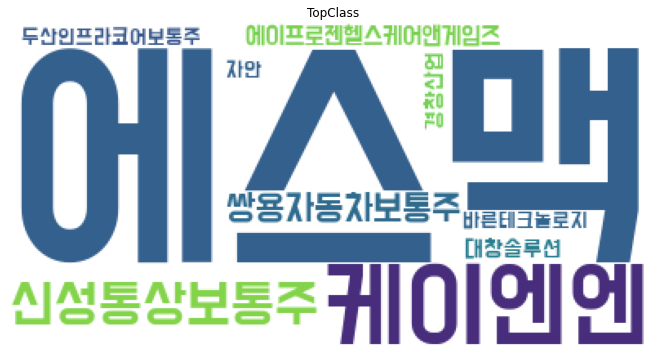

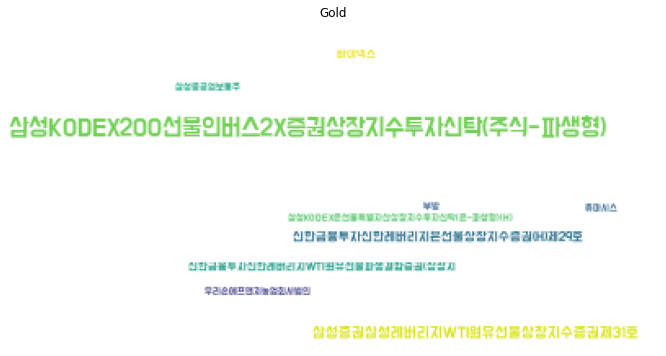

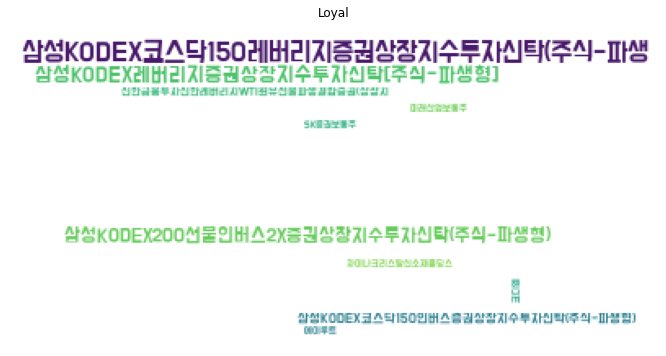

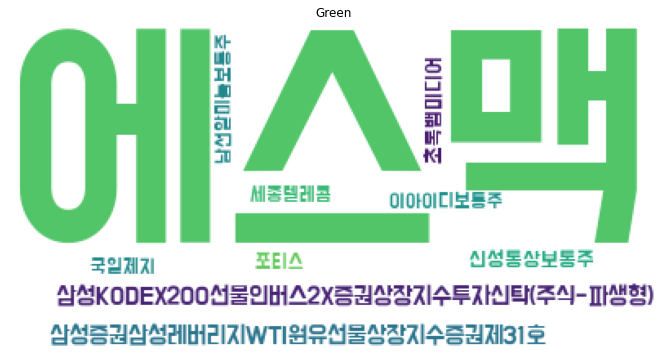

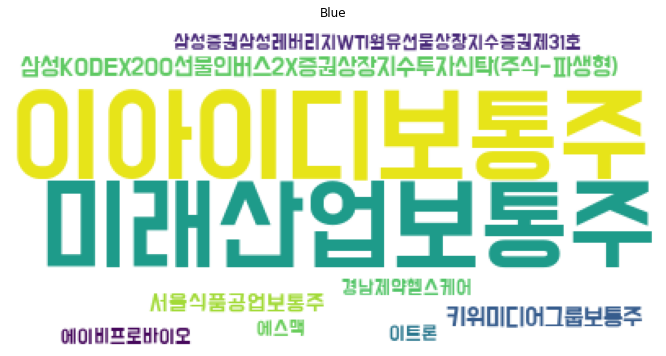

In [93]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
ranks = ["TopClass", "Gold", "Loyal", "Green", "Blue", "No Rank"]
for j in range(5):
  pop_stocks[j]['종목한글명'] = [i.replace(' ', '') for i in [*pop_stocks[j]['종목한글명']]]

  word_01 = pop_stocks[j][['체결수량', '종목한글명']]
  frequencies = word_01.set_index("종목한글명").to_dict()["체결수량"]

  wordcloud = WordCloud(font_path='/content/drive/Shareddrives/dacom_yz/BMDOHYEON_ttf (1).ttf', background_color="white", max_words=20000,max_font_size=300).generate_from_frequencies(frequencies)

  plt.figure(figsize=(21,6))
  plt.title(ranks[j])
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

<탑클래스>에서 1위는 에스맥, 2위는 케이엔엔이었습니다. 하지만 에스맥은 <탑클래스>, <그린 등급>과 <등급 없음>에서만 순위권이었고, 타 등급에서는 순위권 밖이었으며, 케이엔엔은 <탑클래스> 제외 모든 등급에서 순위권에 들지 못했습니다. <u>이는 이전 차트에서의 이슈주의 영향력 대한 분석이 주로 <탑클래스>에 해당하는 것임을 알 수 있습니다. </u>


<br>삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) 상품이 전 등급 (<탑클래스> 제외)에 걸쳐 굉장히 높은 인기를 보여주었고, 이외에도 삼성증권 삼성 레버리지 WTI원유 선물 상장지수증권 제31호 상품 등, 삼성 관련 파생주 중에서도 선물 상품이 <탑클래스> 제외 등급에서 상위권에 속했습니다.<br> **KODEX 200선물인버스2X 상품**은 코스피 지수 하락시 수익을 얻는 '역베팅'과 같은 투기성 상품이라는 점을 고려했을 때, 하위 등급 고객은 분석적으로 투자하는 <탑클래스>와 상이한 투기성 성향을 보인다고 할 수 있습니다. 

<br>그러나 투기성 상품을 제외하면, 2차전지와를 연구하는 이아이디의 보통주가 <그린>, <블루>, <등급 없음>에서 공통적으로 순위권에 들었고, ICT인프라를 공급하는 하드웨어 업체인 이트론 또한 <블루>, <등급 없음> 순위권이었다는 점에서 다음과 같은 세 가지 세분화된 해석을 내놓을 수 있습니다.


## **5.3 결과**
<hr>

 YZ세대의 전반적인 투자가 대체로 1) 4차산업 관련 테마주 2)이슈주(*에스맥(코로나 신약개발))에 의존한다는 이전 분석에 추가하면,

1. <탑클래스> 등급은 다른 다섯 등급과 비교적 독립적인 투자를 하는데, 이슈주에 관심을 두고 분석적으로 진행한다.
2. 나머지 다섯 등급은 선물리버스같은 투기성이 있는 상품 등에 많은 관심을 보인다.
3. 또한 다섯 등급 (<등급 없음> ~ <골드>)에선 대체로 삼성, 이아이디, 이트론 주와 같은 4차 산업 관련주가 인기있었다.

# **6 결론**
<hr>
<hr>

코로나 사태가 지속되면서 급격히 다수 유입된 Y&Z세대를 얼마나 잘 파악하는가가 증권사의 메인 관심사가 되었습니다.
  
  저희 또한 20살 Z세대로, 특별한 수익이 존재하지 않거나, 아르바이트로 적은 수익을 막 얻기 시작한 상태이기 때문에 큰 노력없이 어쩌면 큰 돈을 벌수도 있는 주식에 관심을 가지게 되었습니다. 비유하자면, 저희는 챕터 2의 'new'그룹이라고 볼 수 있겠네요.



신규 투자자로서 이슈주와 같은 최신 동향에 무지해 주로 우리에게 익숙하고 유망하다고 알려진 4차 산업 관련주에 관심을 가지는 Y&Z세대의 모습은 딱 "우리가 만약 주식을 시작했다면 저렇게 하지 않았을까?"라는 생각이 들게 했습니다.
<br><br>

  
이러한 뉴비의 입장에서 생각해봤을 때, 이번 연구에 대한 두 가지 활용방안을 제시할 수 있습니다.






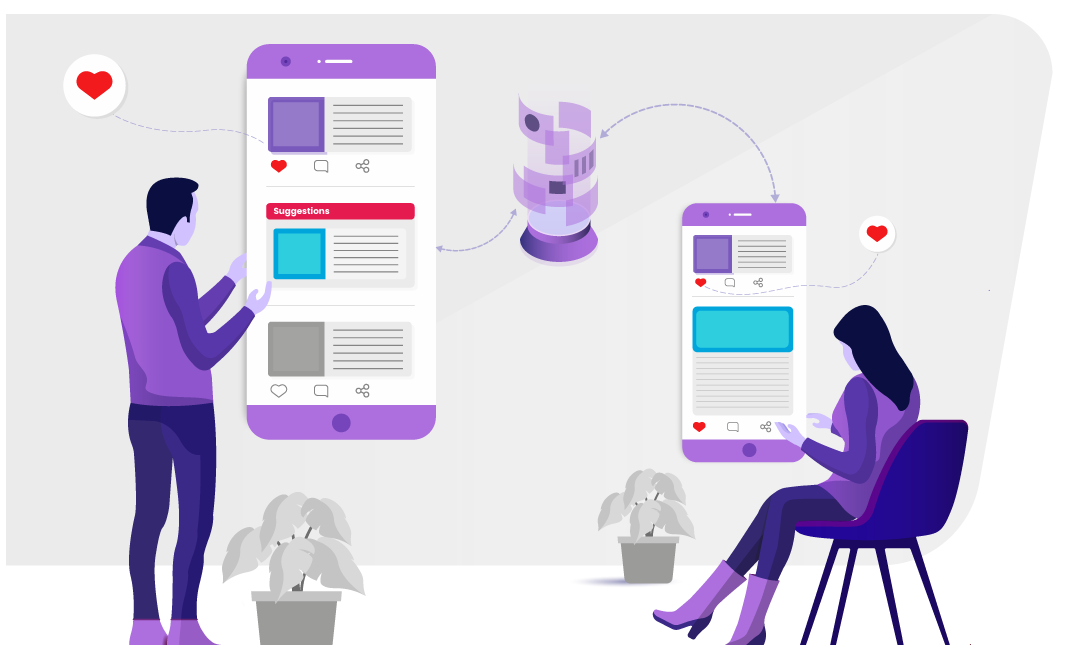

In [94]:
Image('/content/drive/Shareddrives/dacom_yz/rec.PNG', width = 600, height = 400)


### **1.   빅데이터 제공 및 추천 시스템 개발**


> 회원 가입시에 자신이 생각하는 평소 투자성향이나 선호 종목, 위험부담 감수 정도 등에 대해서 가볍게 설문조사를 한 뒤 이를 바탕으로 종목을 추천해줄 수 있을 것입니다.

>  예를 들어서, 연령대가 Y세대에 해당하고 안정성이 어느 정도 있는 상품을 원하며, 최근 주식 동향 등에 대해 잘 모른다고 응답한 신규 투자자에게는 4차 산업 관련주를 우선 추천한 뒤, 추후 투자 히스토리를 데이터로 모아 갱신하여 더욱 발전된 추천을 할 수 있게 될 것입니다. 추천 시스템이 아니라 기초적인 빅데이터만 제시하더라도 신규 투자자에게는 충분히 투자의 길을 잡을 수 있는 단초가 될 것이기에, 기본적으로 생각해볼 수 있는 하나의 아이디어입니다.



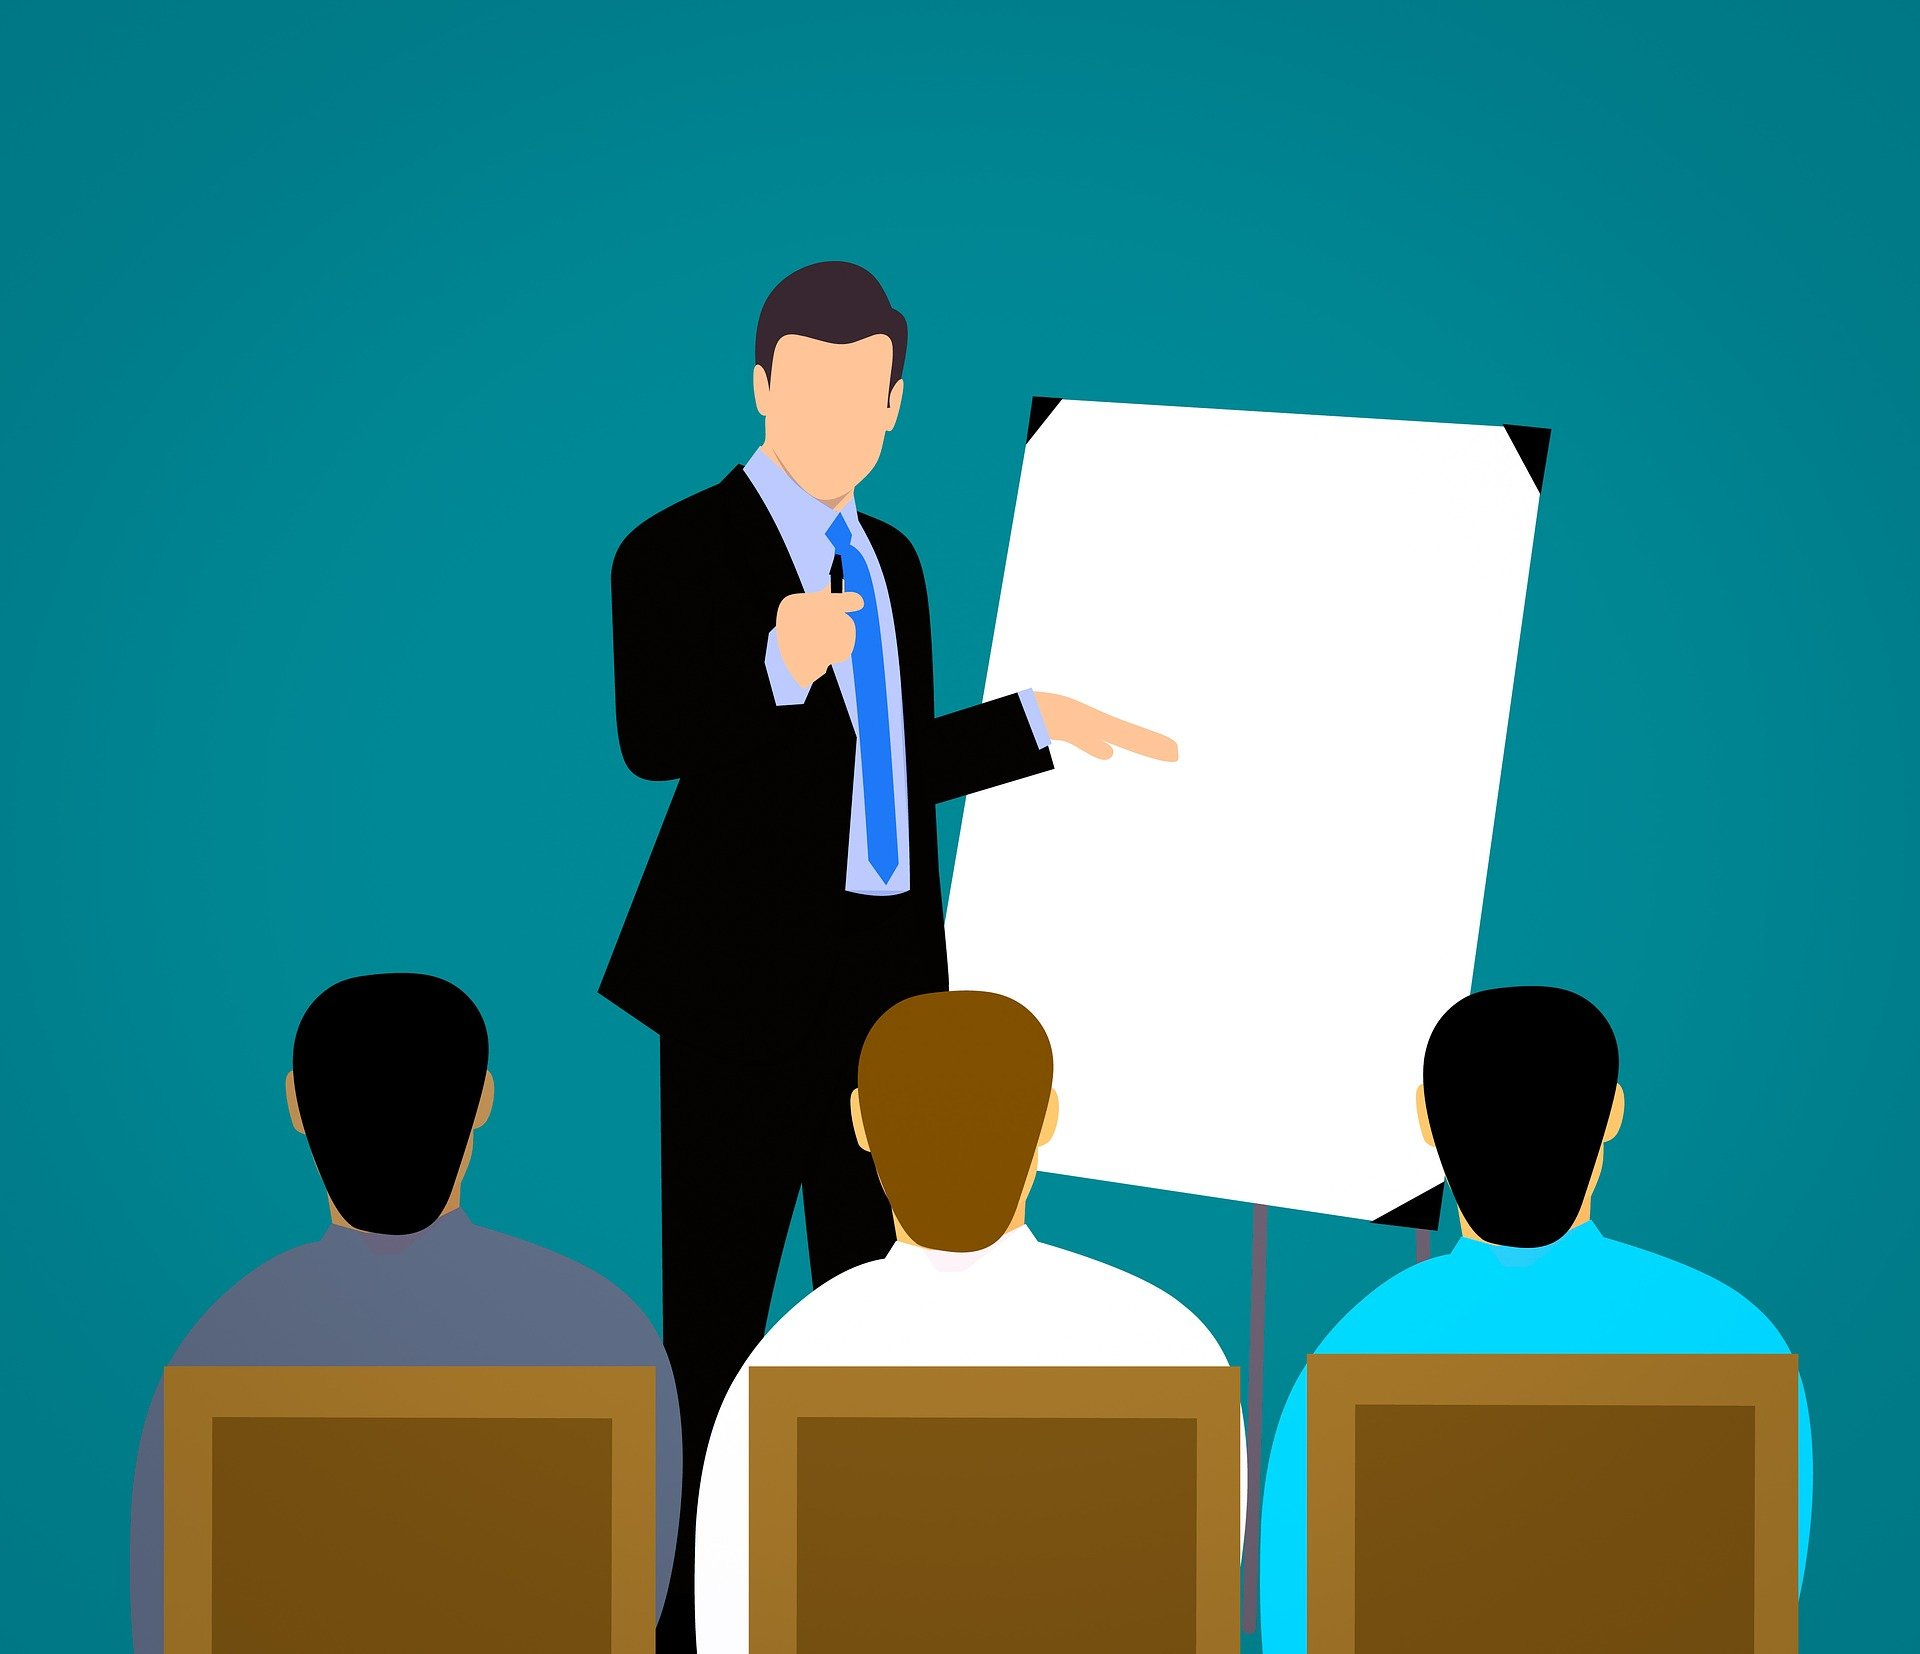

In [95]:
Image('/content/drive/Shareddrives/dacom_yz/lecture.jpg', width = 600, height = 400)


###**2.   기초 이슈주 분석을 돕는 무료 강의**



> Chapter 5.3(결과)에서 분석했듯이, Y&Z 세대는 <탑클래스> 등급을 제외하면 대체로 에스맥(코로나 관련 이슈주)이나 케이엔엔(정치 관련 이슈주)의 예견된 주가 상승으로부터 수익을 얻지 못했습니다. 대부분 선물리버스와 같은 투기성 주식이나 4차 산업관련 소위 말하는 안전빵 테마주에 즉흥적으로 투자하는 경향이 있었는데, 이러한 상황이 먄약 지속적인 젊은 세대의 투자 실패로 이어진다면 금액과 상관없이 Y & Z 세대 고객 유지가 힘들 것입니다.



> 따라서, 퀄리티가 매우 좋아 고수익으로 직결되는 강의가 아니더라도, 적어도 이슈주 분석법과 같은 정보력 획득에 기초적인 도움을 주는 무료 강의를 제공한다면 유입된 뉴비 투자자들을 꽉 붙잡을 수 있을 것이라고 생각합니다. 

그러나 'new'는 Y&Z세대에서도 일부에 속하는 집단이었기 때문에 전체를 대표하지는 못합니다. 오히려, Chapter 5의 결과에서 젊은 세대가 리버스던 레버리지던 '선물 상품'에 관심이 많았다는 것에 집중하면, 차라리

###**3. 선물 상품의 강화**

가 대거 유입되는 Y&Z세대에 대한 좋은 대처법이 될 수 있습니다.

단, 이 활용방안의 경우 2번처럼 Y&Z세대의 투자 실패를 줄여줌으로써 흥미도를 유지시키는 방식이 아닌, 상품 자체의 흥미/자극성을 강화하여 얻는 수익에 의존하게 됩니다. 수익성을 단기적으로 볼 것이냐, 중장기적으로 볼 것이냐는 코로나 사태가 얼마나 유지될지에 대한 예측을 기반으로 Trade-Off 문제를 해쳐나가는 과정의 일부가 될 것입니다.

하지만 무엇보다도, Z세대의 일부로서 이번 연구를 통해 가장 필요성을 느낀 부분은 '초심자 친화적인 서비스'였습니다. 사용자의 입장에서 주식은 한치앞을 볼 수 없는 미지의 영역에 내 돈을 베팅해야합니다. 당연히 내가 투자한 종목의 주가가 올라가느냐 내려가느냐에 희비가 교차합니다. 


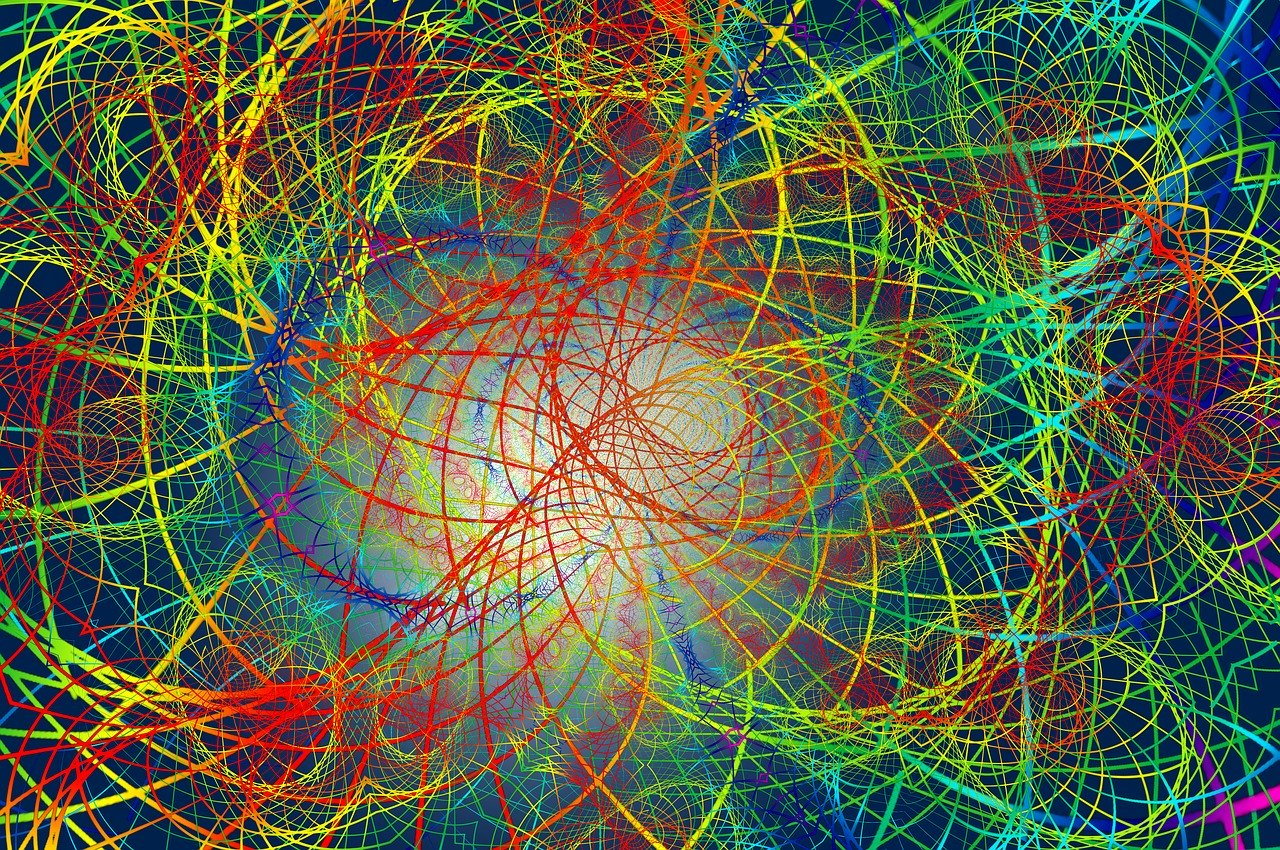

In [96]:
Image('/content/drive/Shareddrives/dacom_yz/chaos.jpg', width = 600, height = 400)

제가 정말 좋아하는 명언입니다.

*오직 통계연구만이 국가를 바르게 이끌 수 있다. 우리는 신의 생각을 이해하기 위하여 통계학을 공부해야 한다. 통계학의 힘으로 신의 의도를 가늠할 수 있기 때문이다.* - 플로렌스 나이팅게일

주식은 신의 영역이라고들 하죠. 통계학의 힘을 빌려 신의 영역 분석에 도전해봤는데, 역시나 쉽지 않았습니다. 그래도 많은 것을 배울 수 있는 좋은 기회였다는 생각이 들어 기쁜 마음으로 글을 마칠 수 있을 것 같습니다:)